In [1]:
import pandas as pd
import seaborn as sns
import matplotlib

from matplotlib.pyplot import plot as plt
from prophet import Prophet
from neuralprophet import NeuralProphet

from matplotlib.pyplot import figure

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [3]:
#!pip install neuralprophet

In [4]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [5]:
for i in train.columns:
    train = train.rename({f'{i}': f'{i.lower()}'}, axis='columns')

In [6]:
train.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [8]:
train['dtsold'] = train[['yrsold','mosold' ]].astype(str).agg('-'.join, axis=1) + '-1'

In [9]:
train['dtsold'] = pd.to_datetime(train['dtsold'], errors='coerce')

In [10]:
train.dtsold.head()

In [11]:
train.dtsold.dtype

dtype('<M8[ns]')

In [12]:
forecast = pd.concat([train.dtsold, train.saleprice], axis=1)
forecast = forecast.sort_values(by='dtsold')

In [13]:
forecast.tail()

,dtsold,saleprice
1160,2010-07-01,146000
1144,2010-07-01,80000
1421,2010-07-01,127500
66,2010-07-01,180000
419,2010-07-01,142000


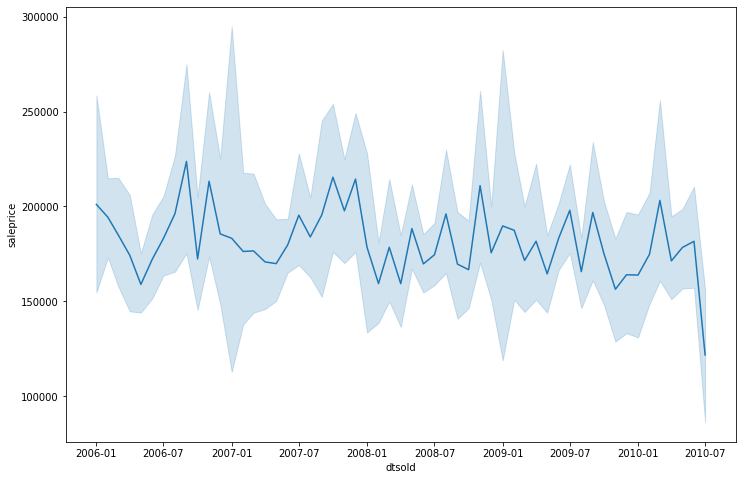

In [14]:
ax = sns.lineplot(x="dtsold", y="saleprice", data=forecast)

In [15]:
forecast = forecast.rename(columns={'dtsold':'ds', 'saleprice':'y'})

In [16]:
p = Prophet(interval_width=0.92, daily_seasonality=True, weekly_seasonality=True)

In [17]:
model = p.fit(forecast)

In [18]:
future = p.make_future_dataframe(periods=200, freq='D')

In [19]:
future

,ds
0,2006-01-01
1,2006-02-01
2,2006-03-01
3,2006-04-01
4,2006-05-01
...,...
250,2011-01-13
251,2011-01-14
252,2011-01-15
253,2011-01-16


In [20]:
forecast_prediction = p.predict(future)
forecast_prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
250,2011-01-13,174977.817267,61010.178160,344648.114908,174791.542599,175148.064852,24352.335376,24352.335376,24352.335376,-2493.653033,...,-3655.369549,-3655.369549,-3655.369549,30501.357958,30501.357958,30501.357958,0.0,0.0,0.0,199330.152642
251,2011-01-14,174972.359571,45391.781669,317279.696606,174784.601480,175144.175783,9743.089571,9743.089571,9743.089571,-2493.653033,...,-3132.899796,-3132.899796,-3132.899796,15369.642401,15369.642401,15369.642401,0.0,0.0,0.0,184715.449142
252,2011-01-15,174966.901875,33114.830957,310251.826059,174777.660360,175140.286713,-2616.583041,-2616.583041,-2616.583041,-2493.653033,...,694.208607,694.208607,694.208607,-817.138614,-817.138614,-817.138614,0.0,0.0,0.0,172350.318835
253,2011-01-16,174961.444180,8064.479715,271710.079131,174770.719241,175136.397644,-29484.197790,-29484.197790,-29484.197790,-2493.653033,...,-9473.485338,-9473.485338,-9473.485338,-17517.059419,-17517.059419,-17517.059419,0.0,0.0,0.0,145477.246390
254,2011-01-17,174955.986484,5465.455596,276123.709952,174763.778121,175132.508574,-36186.867875,-36186.867875,-36186.867875,-2493.653033,...,478.360900,478.360900,478.360900,-34171.575742,-34171.575742,-34171.575742,0.0,0.0,0.0,138769.118609


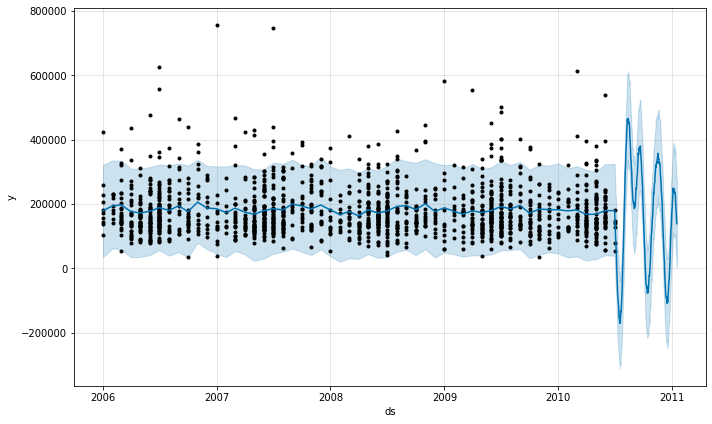

In [21]:
plot1 = p.plot(forecast_prediction)

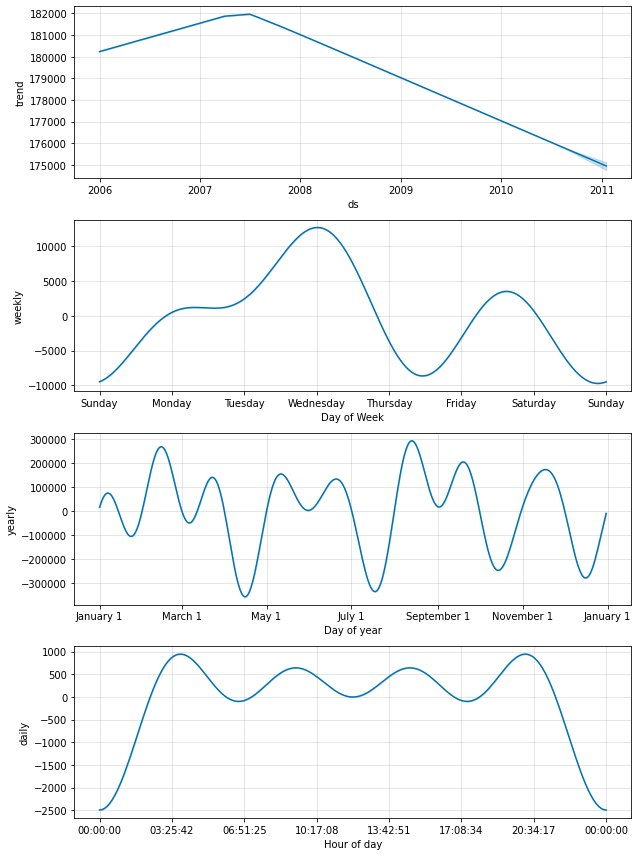

In [22]:
plot2 = p.plot_components(forecast_prediction)